# Classification of Paediatric Inflammatory Bowel Disease using Machine Learning

https://www.nature.com/articles/s41598-017-02606-2.pdf

https://www.nature.com/articles/s41598-017-02606-2

https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-017-02606-2/MediaObjects/41598_2017_2606_MOESM1_ESM.xls

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6382508/

## reading datasets

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm #, datasets

# Cargar el Drive helper y mount
#from google.colab import drive

# Link y Codigo de autorizacion.
#drive.mount('/content/drive_all')


LaboratoryAnalysis = ['Endoscopy','Histology']
TRAIN_data = pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/TrainingDATA_IBD.csv', delimiter=',')
TEST_data = pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/ValidationDATA_IBD.csv',delimiter=',')
features=pd.read_csv('https://raw.githubusercontent.com/avallers/InflammatoryBowelDisease/master/EH_features_IBD.csv', delimiter=',')

#my_data.columns = yearmonths
#my_data.set_index('year', inplace=True)
print(features)
print(' ')
print(TRAIN_data.head())
print(' ')
print(TEST_data.head())

    Endoscopy  Histology 
0       Mouth       Mouth
1  Oesophagus  Oesophagus
2     Stomach     Stomach
3    Duodenum    Duodenum
4       Ileum       Ileum
5     A-Colon     A-Colon
6     T-Colon     T-Colon
7     D-Colon     D-Colon
8      Rectum      Rectum
9    Perianal    Perianal
 
  Training set  Mouth  Oesophagus  ...  Rectum.1  Perianal.1        Diagnosis
0          P_1     -1          -1  ...        -1           0  Crohn_s Disease
1          P_2     -1          -1  ...        -1           0  Crohn_s Disease
2          P_3     -1          -1  ...         1           0  Crohn_s Disease
3          P_4     -1          -1  ...         1           0  Crohn_s Disease
4          P_5     -1          -1  ...        -1           0  Crohn_s Disease

[5 rows x 22 columns]
 
  Validation set  Mouth  Oesophagus  ...  Rectum.1  Perianal.1        Diagnosis
0            V_1     -1          -1  ...         1           0  Crohn_s Disease
1            V_2     -1          -1  ...         1         

In [0]:

feature_names = list(TRAIN_data.iloc[:,1:21])
X = TRAIN_data[feature_names]
y = TRAIN_data['Diagnosis']
#print(TRAIN_data['Diagnosis'].unique())

In [5]:
#TRAIN_data['Diagnosis']
print(TRAIN_data.groupby('Diagnosis').size())

Diagnosis
Crohn_s Disease       143
IBDU                   29
Ulcerative Colitis     67
dtype: int64


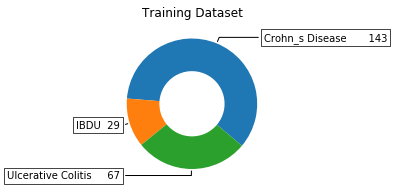

In [0]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Crohn_s Disease       143",
          "IBDU  29",
          "Ulcerative Colitis     67"]

data = [143, 29, 67]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Training Dataset")

plt.show()


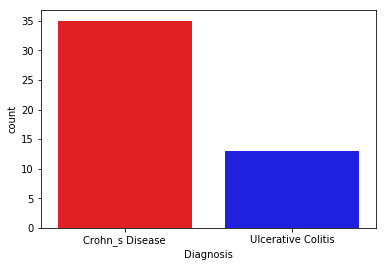

In [0]:
import seaborn as sns

colours = ["red", "blue"]
sns.countplot(TEST_data['Diagnosis'],label="Count",palette=colours)#color="tomato"
plt.show()

In [0]:
TRAIN_data.iloc[:,1:21].head()

,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
0,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
2,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
4,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


# Box plot of all Features

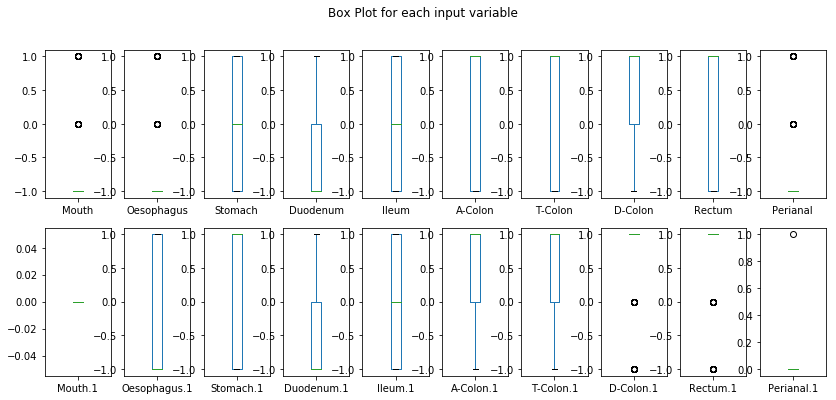

In [0]:
TRAIN_data.drop('Diagnosis', axis=1).plot(kind='box', subplots=True, layout=(2,10), sharex=False, sharey=False, figsize=(14,6), 
                                        title='Box Plot for each input variable')
plt.savefig('InflammatoryBowelDisease')
plt.show()

#Histogram for each feature

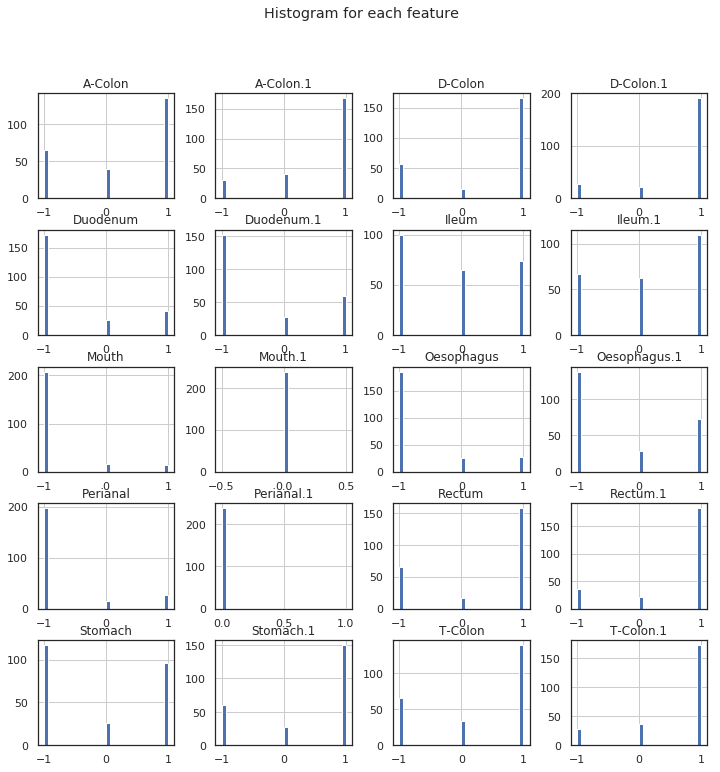

In [0]:
import pylab as pl
TRAIN_data.drop('Diagnosis' ,axis=1).hist(bins=30, figsize=(12,12))
pl.suptitle("Histogram for each feature")
plt.savefig('InflammatoryBowelDisease')
plt.show()

# scatter_matrix Feature vs Feature

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/pl

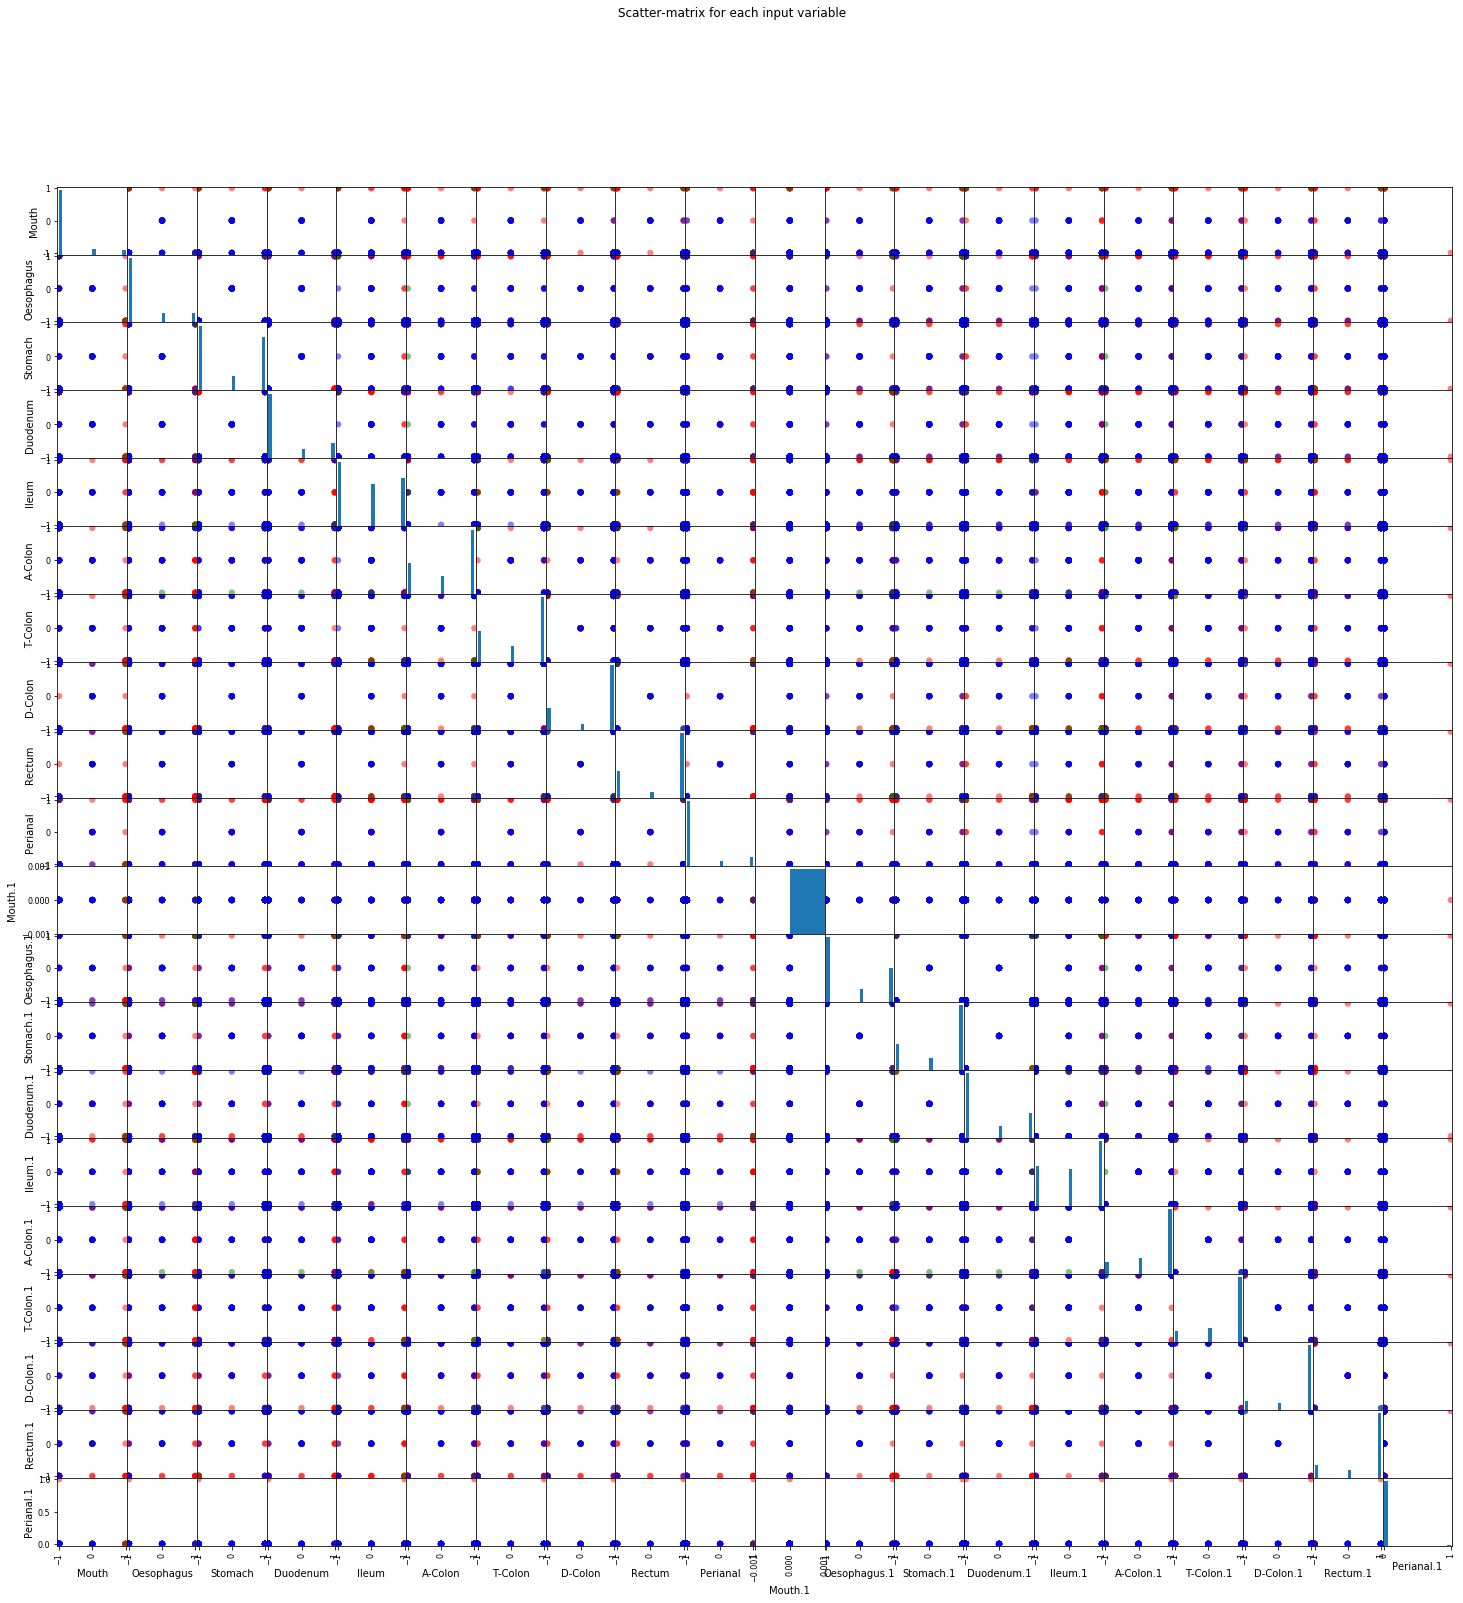

In [0]:
from pandas.plotting import scatter_matrix

#from pandas.tools.plotting import scatter_matrix
#from pandas.plotting import scatter_matrix
from pandas.plotting import scatter_matrix


from matplotlib import cm
feature_names = list(TRAIN_data.iloc[:,1:21])
X = TRAIN_data[feature_names]
y = TRAIN_data['Diagnosis']

#colours = ["blue", "red", "gold","green"]
cc=pd.DataFrame({'Crohn_s Disease':["r"], 'IBDU': ["g"], 'Ulcerative Colitis': ["b"]})
ycc= [cc[t] for t in y]
yc=np.matrix(ycc).flatten()
yc=list(yc.A1)


cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = yc, marker = 'o', s=40, hist_kwds={'bins':20}, figsize=(25,25), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [0]:
X = TRAIN_data.iloc[:,1:21].values
DATA= TRAIN_data.iloc[:,1:21]
yn = TRAIN_data.iloc[:,21]

X_test=TEST_data.iloc[:,1:21].values
yn_test = TRAIN_data.iloc[:,21]


nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in y]
yn=np.matrix(ynn).flatten()
yn=list(yn.A1)


# PCA Principal Component Analysis



https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html




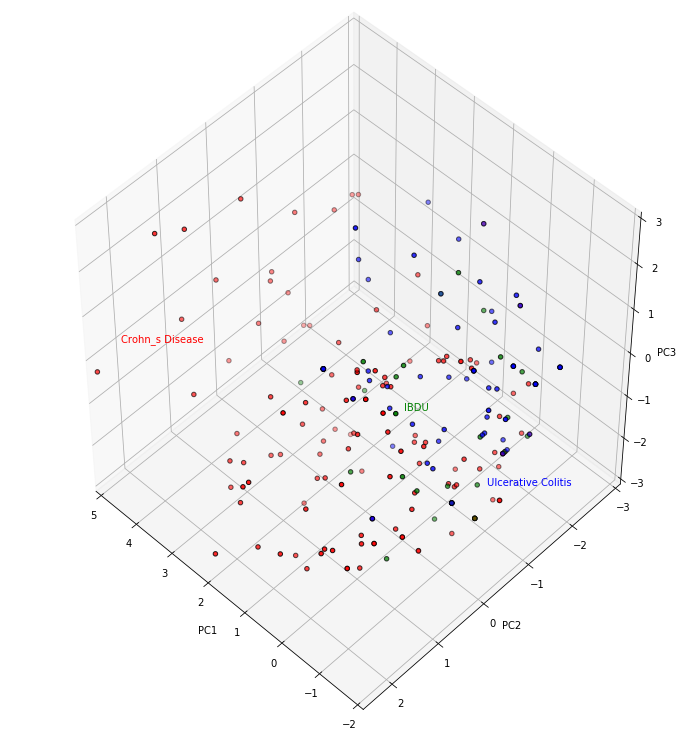

In [10]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = TRAIN_data.iloc[:,1:21].values

y = np.array(yn)#


pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

cc=pd.DataFrame({'Crohn_s Disease':["r"], 'IBDU': ["g"], 'Ulcerative Colitis': ["b"]})
ycc= [cc[t] for t in TRAIN_data['Diagnosis']]
yc=np.matrix(ycc).flatten()
yc=list(yc.A1)
#yc


fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()


# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=yc, cmap=plt.cm.nipy_spectral,edgecolor='k')
ax.text(5, 2, 0, "Crohn_s Disease", color='red')
ax.text(0, 0, 0, "IBDU", color='green')
ax.text(-1, -1, -2, "Ulcerative Colitis", color='blue')

#ax.w_xaxis.set_ticklabels(['PCA1'])
#ax.w_yaxis.set_ticklabels(['PCA2'])
#ax.w_zaxis.set_ticklabels(['PCA3'])
ax.set_xlim(-2, 5)
ax.set_ylim(-3, 2.5)
ax.set_zlim(-3, 3)
ax.set_xlabel("PC1 ")
ax.set_ylabel("PC2 ")
ax.set_zlabel("PC3 ")
#plt.savefig('/content/drive_all//fig-3PCA.svg', dpi=300, format='svg')
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler



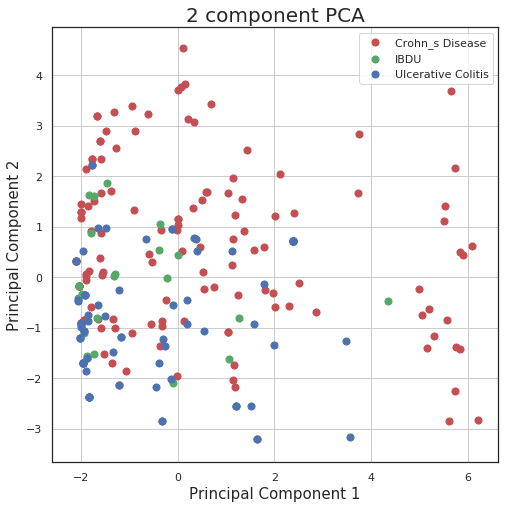

In [0]:
X = TRAIN_data.iloc[:,1:21].values

y = np.array(yn)#


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#finalDf = pd.concat([principalDf, DATA[['target']]], axis = 1)  #
finalDf = pd.concat([principalDf, TRAIN_data[['Diagnosis']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Diagnosis = ['Crohn_s Disease', 'IBDU', 'Ulcerative Colitis']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in TRAIN_data['Diagnosis']]
yn=np.matrix(ynn).flatten()
yn=list(yn.A1)
#yn

feature_names = list(TRAIN_data.iloc[:,0:22])
DF = TRAIN_data[feature_names]
#DF = DF.set_index('Diagnosis')
DF = DF.set_index('Training set') 


In [0]:
feature_names2=['Training set','Diagnosis',
 'Mouth',
 'Oesophagus',
 'Stomach',
 'Duodenum',
 'Ileum',
 'A-Colon',
 'T-Colon',
 'D-Colon',
 'Rectum',
 'Perianal',
 'Mouth.1',
 'Oesophagus.1',
 'Stomach.1',
 'Duodenum.1',
 'Ileum.1',
 'A-Colon.1',
 'T-Colon.1',
 'D-Colon.1',
 'Rectum.1',
 'Perianal.1']

feature_names3=['Diagnosis',
 'Mouth',
 'Oesophagus',
 'Stomach',
 'Duodenum',
 'Ileum',
 'A-Colon',
 'T-Colon',
 'D-Colon',
 'Rectum',
 'Perianal',
  'Oesophagus.1',
 'Stomach.1',
 'Duodenum.1',
 'Ileum.1',
 'A-Colon.1',
 'T-Colon.1',
 'D-Colon.1',
 'Rectum.1',
 'Perianal.1']
DF = TRAIN_data[feature_names2]
#DF = DF.set_index('Diagnosis')
DF = DF.set_index('Training set') 
DF.Diagnosis=yn

dyc=DF

dyc.Diagnosis=np.array(yc)
dyc=dyc.Diagnosis

In [0]:
feature_names5=[
 'Mouth',
 'Oesophagus',
 'Stomach',
 'Duodenum',
 'Ileum',
 'A-Colon',
 'T-Colon',
 'D-Colon',
 'Rectum',
 'Perianal',
  'Oesophagus.1',
 'Stomach.1',
 'Duodenum.1',
 'Ileum.1',
 'A-Colon.1',
 'T-Colon.1',
 'D-Colon.1',
 'Rectum.1',
 'Perianal.1']
DF2 = DF[feature_names3]


# Hierarchical cluster analysis with Heatmap

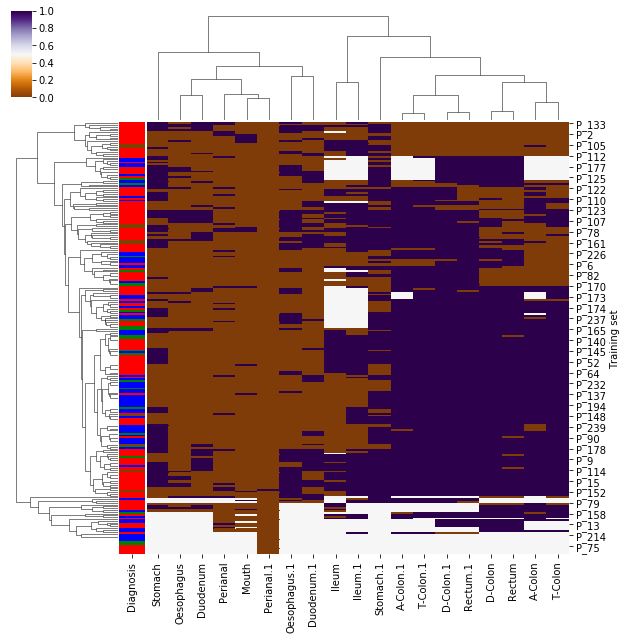

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
 
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip([1,2,3], ["red","green","blue"]))
row_colors = dyc#DF.Diagnosis.map(my_palette)
 
# plot
sns.clustermap((DF2[feature_names5]+1)/2, metric="hamming", method="average", cmap="PuOr", standard_scale=1, row_colors=row_colors)


In [0]:
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip([1,2,3], ["red","green","blue"]))
row_colors = dyc#DF.Diagnosis.map(my_palette)
 
# plot   correlation  euclidean hamming
# sns.clustermap(df, metric = "euclidean" , z_score=1, method="ward", robust=True)

DF5=(DF2[feature_names5]+1)/2

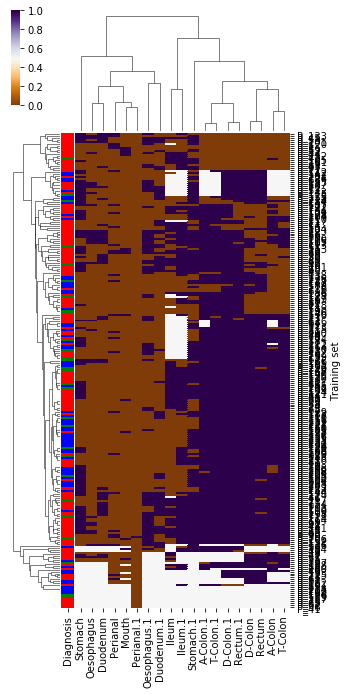

In [19]:
g=sns.clustermap(DF5, metric="hamming", method="average", cmap="PuOr", standard_scale=1, row_colors=row_colors, yticklabels=True, figsize=(5,11)) # single , complete  average


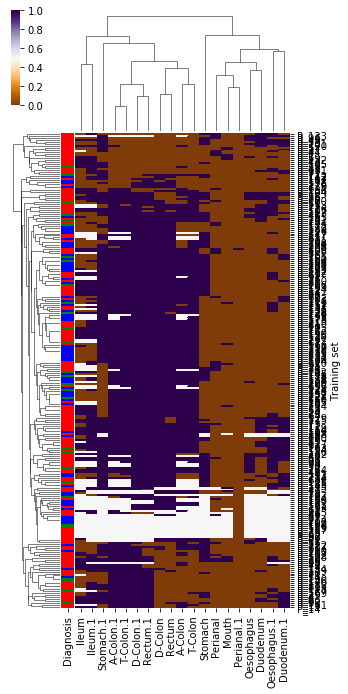

In [20]:
g=sns.clustermap(DF5, metric="euclidean", method="average", cmap="PuOr", standard_scale=1, row_colors=row_colors, yticklabels=True, figsize=(5,11)) # single , complete  average


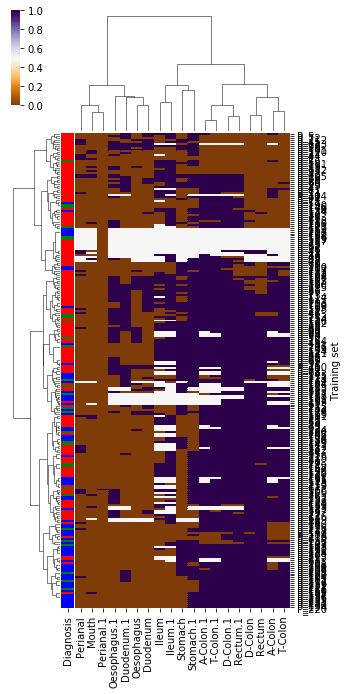

In [21]:
sns.clustermap(DF5, metric = "euclidean" , method="ward", robust=True, cmap="PuOr", standard_scale=1, row_colors=row_colors, yticklabels=True, figsize=(5,11))
